# Capstone Jupyter Notebook 4 - Modeling YouTube Videos (Likes)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Download dataset of unique songs with YouTube videos

In [2]:
songs = pd.read_csv('./Youtube_Unique.csv', index_col='ID')
songs.head()

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,...,Stream,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video
ID,,,,,,,,,,,,,,,,,,,,,
0,Feel Good Inc.,0d28khcov6AiegSCpG5TuT,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6,-6.679,0.1770,...,1.040235e+09,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True
1,Rhinestone Eyes,1foMv2HQwfQ2vntFf9HFeG,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8,-5.815,0.0302,...,3.100837e+08,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True
2,New Gold (feat. Tame Impala and Bootie Brown),64dLd6rVqDLtkXFYrEUHIU,New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1,-3.930,0.0522,...,6.306347e+07,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True
3,On Melancholy Hill,0q6LuUqGLUiCPP1cbdwFs3,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2,-5.810,0.0260,...,4.346636e+08,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True
4,Clint Eastwood,7yMiX7n9SBvadzox8T5jzT,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10,-8.627,0.1710,...,6.172597e+08,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True


In [3]:
songs.isnull().sum()

Track                 0
Track_id              0
Album                 0
Album_type            0
Uri                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Stream              530
Url_youtube           0
Title                 0
Channel               0
Views                 0
Likes                69
Comments             96
Description         386
Licensed              0
official_video        0
dtype: int64

### Drop the songs with null values for `Likes`

In [4]:
pd.DataFrame(songs.dropna(subset=['Likes'], inplace=True))
songs.Likes.isnull().sum()

0

In [5]:
songs.dtypes

Track                object
Track_id             object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms           int64
Stream              float64
Url_youtube          object
Title                object
Channel              object
Views                 int64
Likes               float64
Comments            float64
Description          object
Licensed               bool
official_video         bool
dtype: object

In [6]:
songs.Likes.min(), songs.Likes.max()

(0.0, 50788626.0)

In [7]:
# Change data type of Likes to integer
songs['Likes'] = (songs.Likes).astype('int64')
songs.Likes.dtypes

dtype('int64')

In [8]:
songs.Likes.min(), songs.Likes.max()

(0, 50788626)

In [9]:
songs.columns

Index(['Track', 'Track_id', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Stream', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video'],
      dtype='object')

### Investigate values in columns

In [10]:
songs.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream,Views,Likes,Comments
count,18419.000000,18419.000000,18419.000000,18419.000000,18419.000000,18419.000000,18419.000000,18419.00000,18419.00000,18419.000000,1.841900e+04,1.789200e+04,1.841900e+04,1.841900e+04,1.834500e+04
mean,0.617948,0.634342,5.302785,-7.696457,0.095012,0.287743,0.056572,0.19130,0.52917,120.774920,2.225435e+05,1.326830e+08,8.932201e+07,6.229390e+05,2.654629e+04
std,0.164748,0.215296,3.576297,4.600150,0.110953,0.287769,0.193245,0.16466,0.24689,29.649434,9.100160e+04,2.382695e+08,2.611502e+08,1.680476e+06,1.922899e+05
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.01450,0.00000,0.000000,3.098500e+04,6.574000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.515000,0.503000,2.000000,-8.921500,0.035300,0.040900,0.000000,0.09400,0.33800,97.003500,1.807510e+05,1.726959e+07,1.763788e+06,2.068200e+04,4.970000e+02
50%,0.635000,0.665000,5.000000,-6.585000,0.049800,0.185000,0.000003,0.12400,0.53500,119.974000,2.133570e+05,4.889275e+07,1.376010e+07,1.169820e+05,3.134000e+03
75%,0.739000,0.799000,8.000000,-4.966000,0.101000,0.474000,0.000552,0.23500,0.72800,139.979000,2.521135e+05,1.355264e+08,6.674123e+07,4.846825e+05,1.363700e+04
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.00000,0.99300,243.372000,4.676058e+06,3.386520e+09,8.079647e+09,5.078863e+07,1.608314e+07


### Attempt to find correlations between variables

In [11]:
songs.corr()

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_24432\2131039685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream,Views,Likes,Comments,Licensed,official_video
Danceability,1.000000,0.222744,0.031565,0.336784,0.214320,-0.265378,-0.304699,-0.080068,0.463899,-0.072962,-0.118552,0.063184,0.082120,0.095193,0.042212,0.002635,0.031308
Energy,0.222744,1.000000,0.030405,0.742700,0.070841,-0.662749,-0.295731,0.170540,0.383726,0.160484,0.022411,0.040206,0.065167,0.061912,0.043570,0.091145,0.117516
Key,0.031565,0.030405,1.000000,0.022688,0.017182,-0.027198,0.005621,-0.006019,0.038017,-0.002737,-0.005567,-0.007713,0.005336,0.005711,0.006250,-0.002296,0.006669
Loudness,0.336784,0.742700,0.022688,1.000000,0.039427,-0.548197,-0.531051,0.085280,0.301439,0.144392,0.005879,0.113469,0.117055,0.123888,0.058650,0.108029,0.150466
Speechiness,0.214320,0.070841,0.017182,0.039427,1.000000,-0.079867,-0.107768,0.087578,0.056628,0.033042,-0.072878,-0.018742,-0.016406,0.008075,0.009262,-0.059622,-0.053506
Acousticness,-0.265378,-0.662749,-0.027198,-0.548197,-0.079867,1.000000,0.262431,-0.045086,-0.198902,-0.131475,-0.034028,-0.097205,-0.070924,-0.079984,-0.052440,-0.080004,-0.094286
Instrumentalness,-0.304699,-0.295731,0.005621,-0.531051,-0.107768,0.262431,1.000000,-0.060439,-0.258417,-0.076393,-0.002250,-0.090683,-0.077481,-0.076558,-0.030145,-0.054558,-0.066872
Liveness,-0.080068,0.170540,-0.006019,0.085280,0.087578,-0.045086,-0.060439,1.000000,0.036191,0.008689,0.009535,-0.039883,-0.014354,-0.021282,-0.011816,0.001981,0.007066
Valence,0.463899,0.383726,0.038017,0.301439,0.056628,-0.198902,-0.258417,0.036191,1.000000,0.092520,-0.068513,-0.015917,0.032175,0.007093,0.014364,0.011384,0.003308
Tempo,-0.072962,0.160484,-0.002737,0.144392,0.033042,-0.131475,-0.076393,0.008689,0.092520,1.000000,-0.011799,0.005126,0.001928,0.007105,0.008818,0.010627,0.023099


In [12]:
songs.corr().Likes.sort_values()

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_24432\350863668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr().Likes.sort_values()


Acousticness       -0.079984
Instrumentalness   -0.076558
Liveness           -0.021282
Key                 0.005711
Valence             0.007093
Tempo               0.007105
Speechiness         0.008075
Duration_ms         0.010671
Energy              0.061912
Danceability        0.095193
Loudness            0.123888
official_video      0.146817
Licensed            0.153183
Comments            0.620924
Stream              0.656733
Views               0.885496
Likes               1.000000
Name: Likes, dtype: float64

### Unfortunately, none of the metric variables are strongly correlated to the number of likes.

### Create a list of all the metric (input variable) columns

In [13]:
feature_columns = list(songs.describe().columns)
feature_columns = feature_columns[0:11]
print(feature_columns)

['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']


### This function takes a DataFrame, a list of input columns, and a regression type as inputs, creates a model to predict the number of streams a song has, and returns the RMSE of the model.

In [14]:
def get_rmse(df, cols, reg):
    X = df[cols]
    y = df.Likes
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    reg.fit(X_train, y_train)
    
    preds = reg.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, preds))

In [15]:
# Three regression types in the scikit-learn library
lin_reg = LinearRegression()
rand_for_reg = RandomForestRegressor()
kn_reg = KNeighborsRegressor()

### Use the average number of likes in the test data as a baseline

In [16]:
X = songs[feature_columns]
y = songs.Likes

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

y_test_mean = y_test.mean()
print('Average number of likes in test data =', round(y_test_mean))

Average number of likes in test data = 623573


### For a model to be good, its RMSE must be less than the baseline RMSE.

In [17]:
baseline_series = [y_test_mean] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_series))
best_rmse = baseline_rmse
print('Baseline RMSE =', round(best_rmse))

Baseline RMSE = 1751936


In [18]:
# This function returns and prints the smaller RMSE.
# This will be used a lot!
def new_best_rmse(rmse_new, rmse_old):
    print('RMSE for this model =', round(rmse_new))
    if rmse_new < rmse_old:
        print('This is now the best RMSE.')
        return rmse_new
    print('The best RMSE is still', round(rmse_old))
    return rmse_old

### Now create a linear regression model with all input variables and calculate the RMSE

In [19]:
rmse = get_rmse(songs, feature_columns, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1730766
This is now the best RMSE.


In [20]:
100 * (1 - best_rmse/baseline_rmse)

1.2083618954663922

### The RMSE of the linear regression model is 1.21% better than the baseline.
### Let's try a random forest regression model with the same inputs.

In [21]:
rmse = get_rmse(songs, feature_columns, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1724368
This is now the best RMSE.


### The random forest regression is better than the linear regression.
### What about k-neighbors regression?

In [22]:
rmse = get_rmse(songs, feature_columns, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1904167
The best RMSE is still 1724368


### With 50 neighbors?

In [23]:
kn_reg = KNeighborsRegressor(n_neighbors=50)
rmse = get_rmse(songs, feature_columns, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1752175
The best RMSE is still 1724368


### The best model so far is random forest regression.

### Now apply feature engineering to the `Key` column by changing it from numerical to categorical

In [24]:
songs.Key.value_counts()

0     2053
7     1987
1     1938
2     1821
9     1770
5     1550
11    1491
4     1350
8     1325
6     1277
10    1267
3      590
Name: Key, dtype: int64

In [25]:
key_dummies = pd.get_dummies(songs.Key, prefix='Key', drop_first=True)
songs2 = pd.concat([songs, key_dummies], axis=1)
songs2.drop('Key', axis=1, inplace=True)
songs2.columns

Index(['Track', 'Track_id', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Stream', 'Url_youtube',
       'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description',
       'Licensed', 'official_video', 'Key_1', 'Key_2', 'Key_3', 'Key_4',
       'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10', 'Key_11'],
      dtype='object')

### The new dataframe contains dummy columns for each value of `Key` except 0, because it was the most common value.
### Create a list of feature columns with the new dummy variables

In [26]:
feature_columns_2 = list(songs2.describe().columns)[0:10]
feature_columns_2.extend(list(songs2.describe().columns)[-11:])
print(feature_columns_2)

['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Key_1', 'Key_2', 'Key_3', 'Key_4', 'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10', 'Key_11']


In [27]:
rmse = get_rmse(songs2, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1730685
The best RMSE is still 1724368


### This linear regression is better than the linear regression without dummy variables, but not the random forest regression.

In [28]:
rmse = get_rmse(songs2, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1725755
The best RMSE is still 1724368


### Random forest regression with dummiy variables is the best model so far.
### Can k-neighbors regression beat that?

In [29]:
kn_reg = KNeighborsRegressor(n_neighbors=50)
rmse = get_rmse(songs2, feature_columns_2, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1752188
The best RMSE is still 1724368


### No, it did not.
### Now try removing outliers

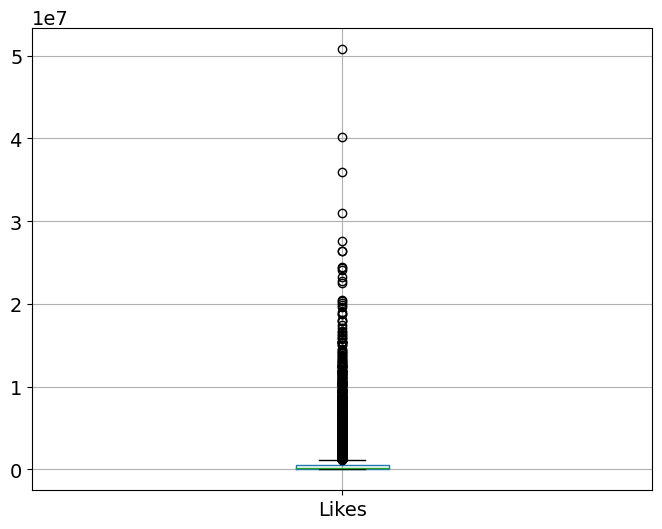

In [30]:
songs2.boxplot(column='Likes');

In [31]:
songs2[songs2.Views > 3e7]

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
ID,,,,,,,,,,,,,,,,,,,,,
0,Feel Good Inc.,0d28khcov6AiegSCpG5TuT,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,-6.679,0.1770,0.008360,...,0,0,0,0,1,0,0,0,0,0
1,Rhinestone Eyes,1foMv2HQwfQ2vntFf9HFeG,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,-5.815,0.0302,0.086900,...,0,0,0,0,0,0,1,0,0,0
3,On Melancholy Hill,0q6LuUqGLUiCPP1cbdwFs3,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,-5.810,0.0260,0.000015,...,1,0,0,0,0,0,0,0,0,0
4,Clint Eastwood,7yMiX7n9SBvadzox8T5jzT,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,-8.627,0.1710,0.025300,...,0,0,0,0,0,0,0,0,1,0
5,DARE,4Hff1IjRbLGeLgFgxvHflk,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,-5.852,0.0372,0.022900,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20674,No Se Va - En Vivo,23Lyy7ZXRvzfgH4JtDkKrX,No Se Va (En Vivo),single,spotify:track:23Lyy7ZXRvzfgH4JtDkKrX,0.594,0.527,-9.335,0.0335,0.121000,...,0,0,0,0,0,0,0,0,0,0
20685,Left and Right (Feat. Jung Kook of BTS) - Acap...,0lWsA6TPYDRWenhCJrbfYu,Left and Right (Feat. Jung Kook of BTS),single,spotify:track:0lWsA6TPYDRWenhCJrbfYu,0.571,0.169,-8.628,0.0554,0.753000,...,0,0,0,0,0,0,0,1,0,0
20688,Left and Right (feat. Jung Kook of BTS) - Inst...,3QRJgF8HY4zEuboEy4Q1gd,Left and Right (feat. Jung Kook of BTS) [Instr...,single,spotify:track:3QRJgF8HY4zEuboEy4Q1gd,0.899,0.464,-8.003,0.0667,0.504000,...,1,0,0,0,0,0,0,0,0,0


In [32]:
# Remove the 22 songs with the highest likes
songs3 = songs2[songs2.Views <= 3e9]

In [33]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1525261
This is now the best RMSE.


### The model is better without those outliers. Will removing more outliers improve it?

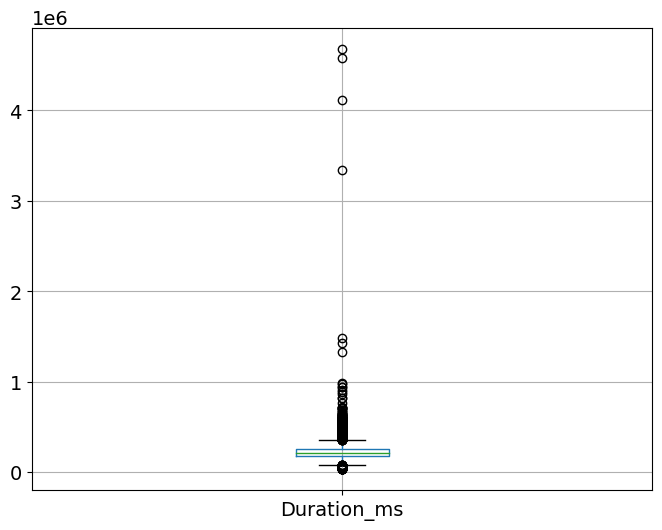

In [34]:
songs3.boxplot(column='Duration_ms');

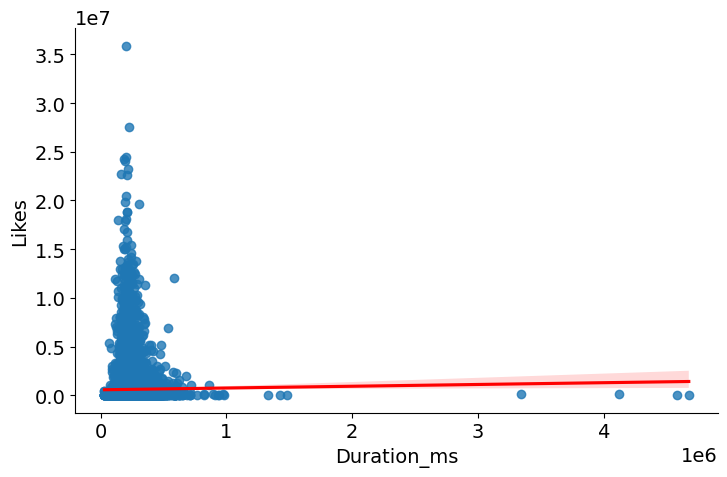

In [35]:
sns.lmplot(data=songs3, x='Duration_ms', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [36]:
songs3[songs2.Duration_ms > 1e6]

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_24432\3073700682.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs3[songs2.Duration_ms > 1e6]


,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
ID,,,,,,,,,,,,,,,,,,,,,
2943,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,1FSYDJAlyHAabWhiGgYfDq,52 Non Stop Dilbar Dilbar Remix,compilation,spotify:track:1FSYDJAlyHAabWhiGgYfDq,0.5210,0.837,-4.501,0.0794,0.0593,...,0,0,0,0,0,1,0,0,0,0
4449,Om Bhurbhuwasah,3oj9ZcytkTaovswquxjzo1,Gayatri Mantra,single,spotify:track:3oj9ZcytkTaovswquxjzo1,0.7190,0.466,-9.153,0.0417,0.7330,...,0,1,0,0,0,0,0,0,0,0
5246,Hitazos: Amores Como el Nuestro / Que Fue / Al...,2ZixSR7OKIpdPUk4dwOekn,Hitazos: Amores Como el Nuestro / Que Fue / Al...,compilation,spotify:track:2ZixSR7OKIpdPUk4dwOekn,0.5190,0.790,-4.342,0.0503,0.2300,...,0,0,0,0,0,1,0,0,0,0
5385,Ragga Moofin Mix,6ZbWeRhL76RXghqoMNF932,"Playero 37 ""Underground""",album,spotify:track:6ZbWeRhL76RXghqoMNF932,0.7970,0.670,-14.259,0.1770,0.0354,...,0,0,0,0,1,0,0,0,0,0
5387,Non Stop Reegae,5EVCuT4L4hsyDtA7H1yByW,"Playero 38 ""Underground""",album,spotify:track:5EVCuT4L4hsyDtA7H1yByW,0.8570,0.673,-11.922,0.0949,0.0258,...,0,0,0,0,0,0,0,0,0,0
9361,Ocean Waves for Sleep,1saXdvEAafdRzUphXBzSHg,Ocean Waves,single,spotify:track:1saXdvEAafdRzUphXBzSHg,0.0797,0.995,-17.379,0.0612,0.9320,...,0,0,0,0,0,0,0,0,0,0
10475,High Rated Gabru 52 Non Stop Hits(Remix By Man...,2HyMuSCZJIxgnZBkuPT3TA,High Rated Gabru 52 Non Stop Hits,compilation,spotify:track:2HyMuSCZJIxgnZBkuPT3TA,0.3850,0.935,-2.545,0.2590,0.0843,...,1,0,0,0,0,0,0,0,0,0


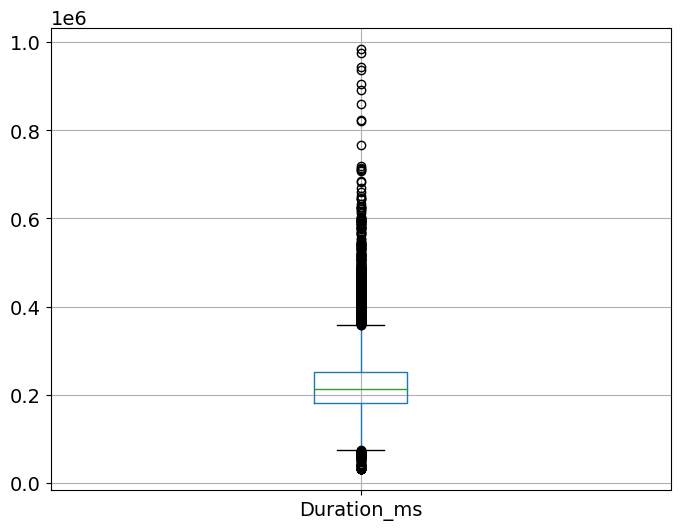

In [37]:
# Remove songs over 1,000,000 ms long
songs4 = songs3[songs3.Duration_ms <= 1e6]
songs4.boxplot(column='Duration_ms');

In [38]:
rmse = get_rmse(songs4, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1538581
The best RMSE is still 1525261


In [39]:
rmse = get_rmse(songs4, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1553992
The best RMSE is still 1525261


### No improvement. Revert back to previous dataset (`songs3`).

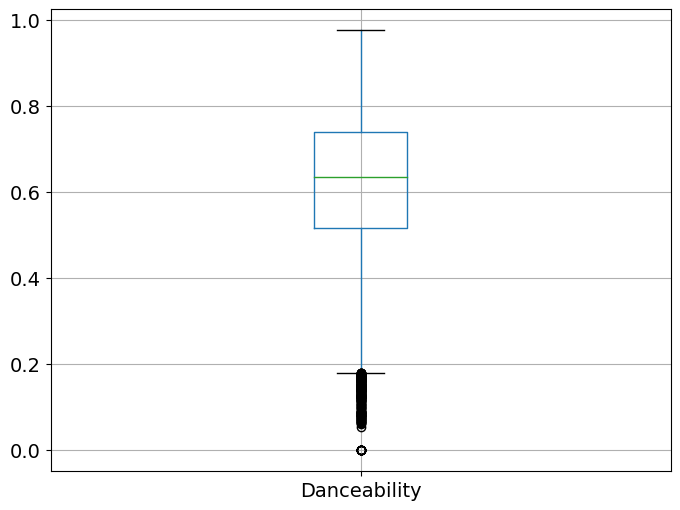

In [40]:
songs3.boxplot(column='Danceability');

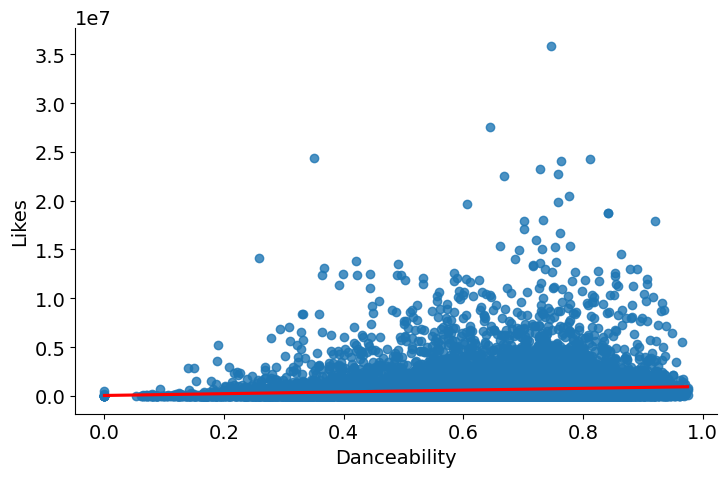

In [41]:
sns.lmplot(data=songs3, x='Danceability', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [42]:
songs3[songs3.Danceability == 0.0]

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
ID,,,,,,,,,,,,,,,,,,,,,
2073,"Hello, Dolly!",63kd4m3VFxcJjPVVtbVNAu,"Hello, Dolly! (Remastered)",album,spotify:track:63kd4m3VFxcJjPVVtbVNAu,0.0,0.405000,-9.935,0.0,0.84200,...,0,0,0,0,0,0,0,0,0,0
2871,Arrival,6quMGNh47CpSR5kmZSYSTK,Israeli Salad,album,spotify:track:6quMGNh47CpSR5kmZSYSTK,0.0,0.802000,-7.977,0.0,0.00417,...,0,0,0,0,0,0,0,0,0,0
7187,"Rigoletto / Act 3: ""La donna è mobile"" - Live",4mZlQk9Ha7WwJZUngARQeY,The Three Tenors - The Best of the 3 Tenors,compilation,spotify:track:4mZlQk9Ha7WwJZUngARQeY,0.0,0.402000,-15.718,0.0,0.97200,...,0,0,0,1,0,0,0,0,0,0
8373,Adieux,0aGA1zFV0ER1xLiJmHxb2s,You And The Night,album,spotify:track:0aGA1zFV0ER1xLiJmHxb2s,0.0,0.105000,-13.925,0.0,0.98900,...,0,0,0,0,0,1,0,0,0,0
9266,The Departure,59gg6zQhSKGVnkT3hWAY3l,Voyager - Essential Max Richter,album,spotify:track:59gg6zQhSKGVnkT3hWAY3l,0.0,0.036200,-22.519,0.0,0.99400,...,0,0,0,0,0,0,0,0,0,0
9348,Beach Waves and Soothing Brown Noise,0tIkLggEJ9QriD7KFz1GGA,Soothing Brown Noise Waves and Calming Ambient...,album,spotify:track:0tIkLggEJ9QriD7KFz1GGA,0.0,0.000252,-17.746,0.0,0.00948,...,0,0,0,0,0,0,0,1,0,0
13839,Clean White Noise - Loopable with no fade,2bRKxuH1o7pTmb1y4GfdEc,Best White Noise for Baby Sleep - Loopable wit...,album,spotify:track:2bRKxuH1o7pTmb1y4GfdEc,0.0,0.003420,-28.460,0.0,0.79100,...,0,0,0,0,0,0,1,0,0,0
13840,Pure Brown Noise - Loopable with no fade,5I21rMWLtCjWQl6QyLn85W,Best White Noise for Baby Sleep - Loopable wit...,album,spotify:track:5I21rMWLtCjWQl6QyLn85W,0.0,0.001250,-27.592,0.0,0.90800,...,0,0,0,0,0,0,0,0,0,0
13842,Air Conditioner - Loopable with no fade,4f9s3wr1e1QdpMDxQosSTz,Best White Noise for Baby Sleep - Loopable wit...,album,spotify:track:4f9s3wr1e1QdpMDxQosSTz,0.0,0.000055,-21.995,0.0,0.92100,...,0,0,0,0,0,0,0,0,1,0


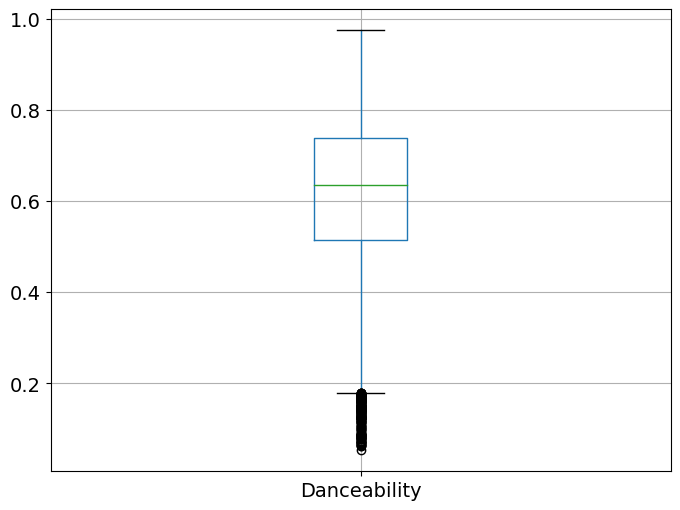

In [43]:
# Remove songs with danceability of 0.0
songs4 = songs3[songs3.Danceability > 0.0]
songs4.boxplot(column='Danceability');

In [44]:
rmse = get_rmse(songs4, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1483612
This is now the best RMSE.


In [45]:
rmse = get_rmse(songs4, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1476061
This is now the best RMSE.


### Removing songs with `Danceability` = 0 improved the RMSE

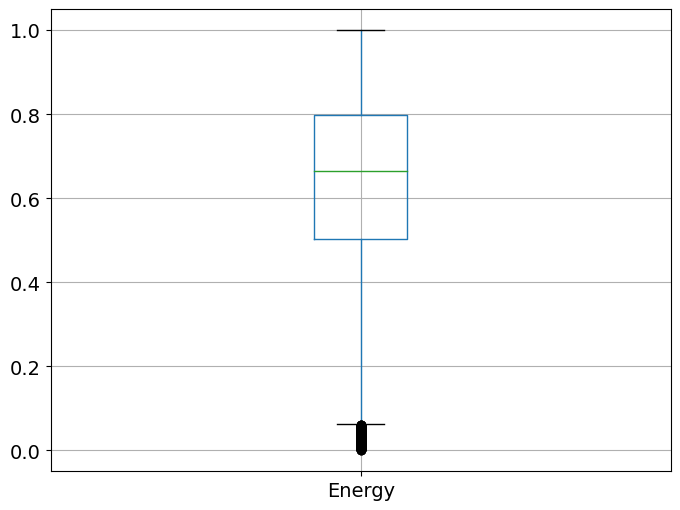

In [46]:
songs4.boxplot(column='Energy');

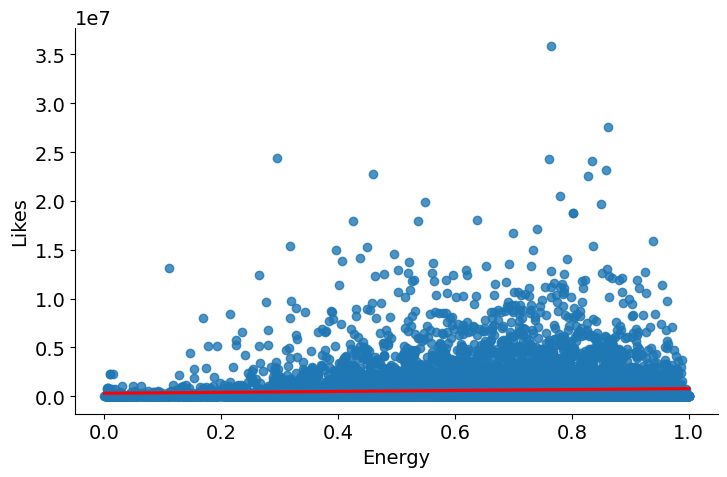

In [47]:
sns.lmplot(data=songs4, x='Energy', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

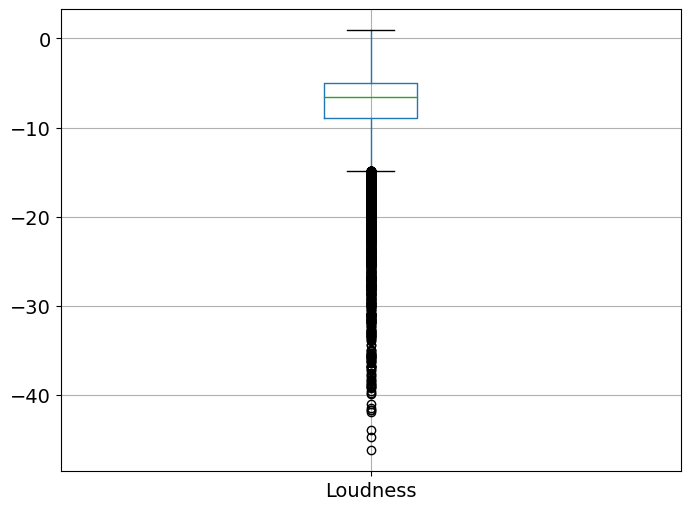

In [48]:
songs4.boxplot(column='Loudness');

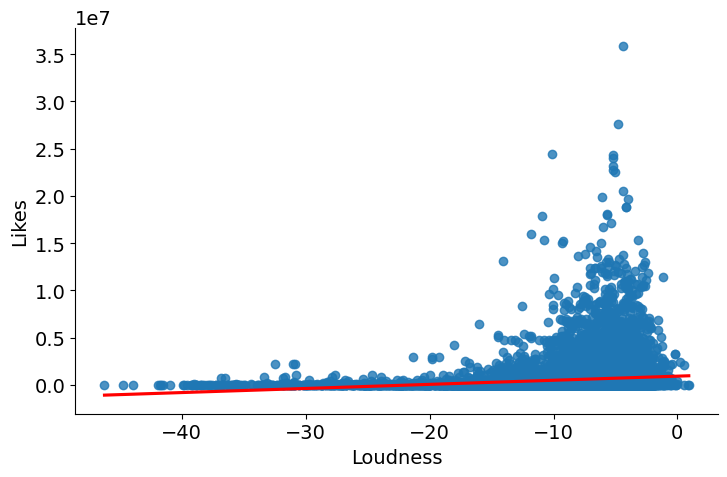

In [49]:
sns.lmplot(data=songs4, x='Loudness', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

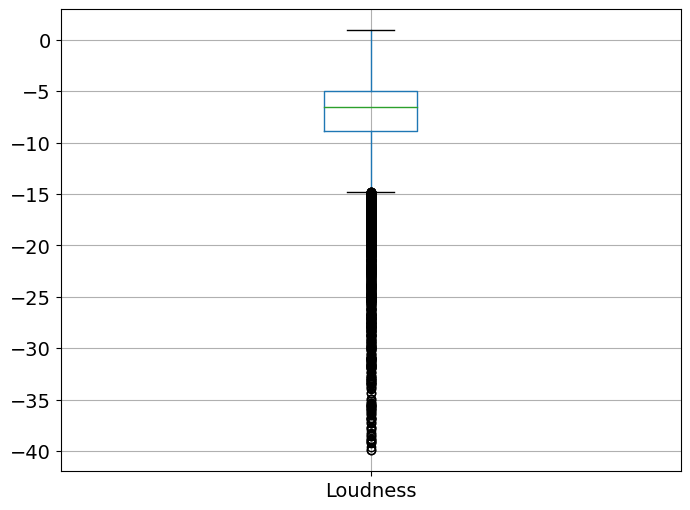

In [50]:
# Remove songs with loudness less than -40 dB
songs5 = songs4[songs4.Loudness >= -40]
songs5.boxplot(column='Loudness');

In [51]:
rmse = get_rmse(songs5, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1432140
This is now the best RMSE.


In [52]:
rmse = get_rmse(songs5, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1444062
The best RMSE is still 1432140


### Removing songs quieter than -40 dB improved the RMSE, but this time, linear regression is better than random forest.

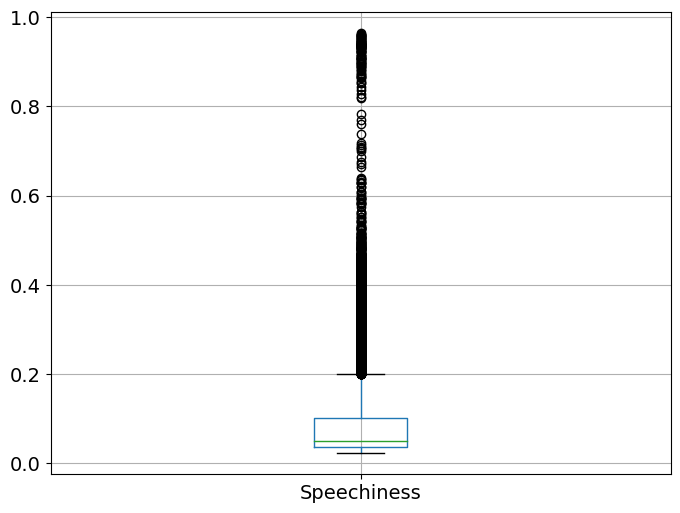

In [53]:
songs5.boxplot(column='Speechiness');

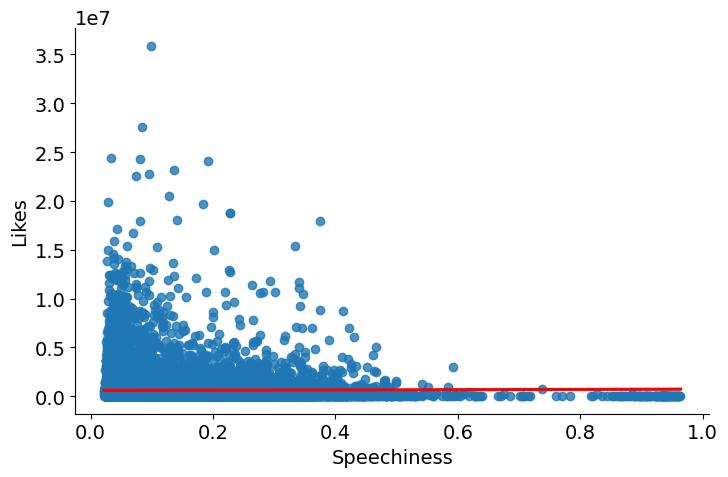

In [54]:
sns.lmplot(data=songs5, x='Speechiness', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

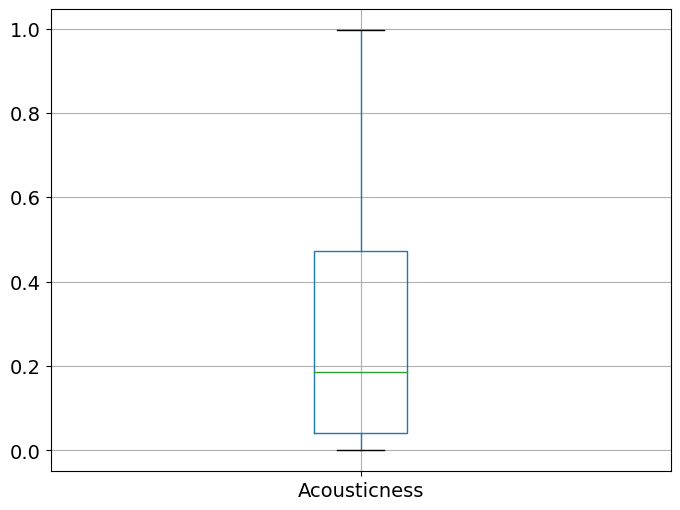

In [55]:
songs5.boxplot(column='Acousticness');

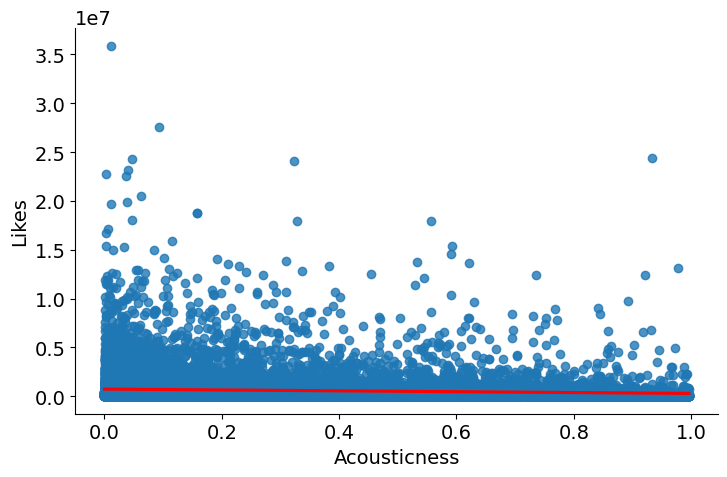

In [56]:
sns.lmplot(data=songs5, x='Acousticness', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

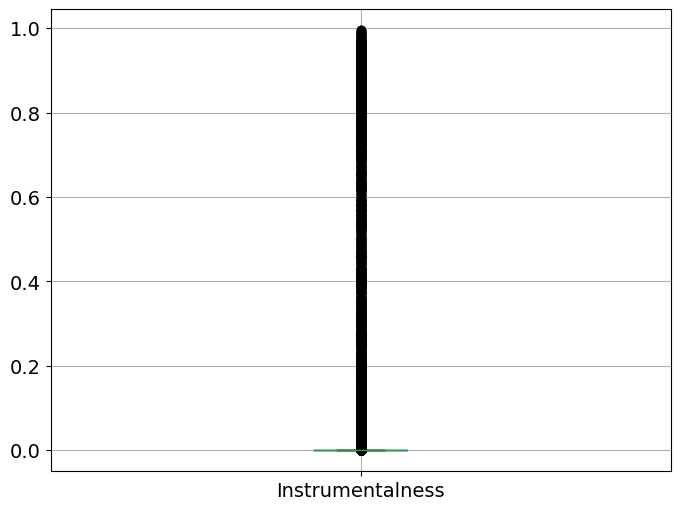

In [57]:
songs5.boxplot(column='Instrumentalness');

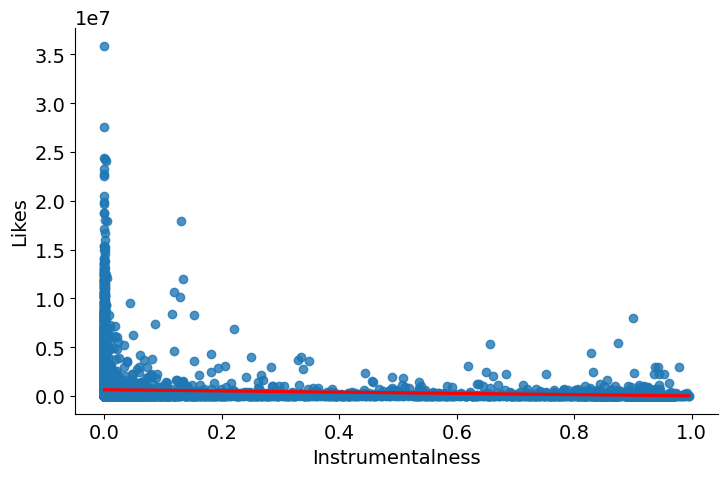

In [58]:
sns.lmplot(data=songs5, x='Instrumentalness', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

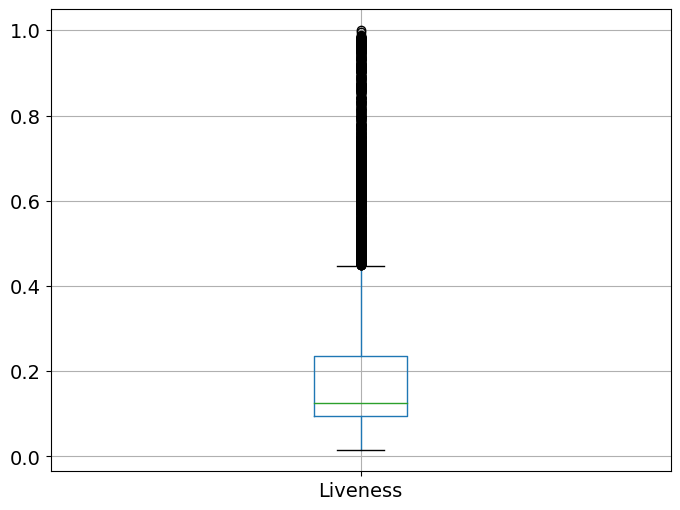

In [59]:
songs5.boxplot(column='Liveness');

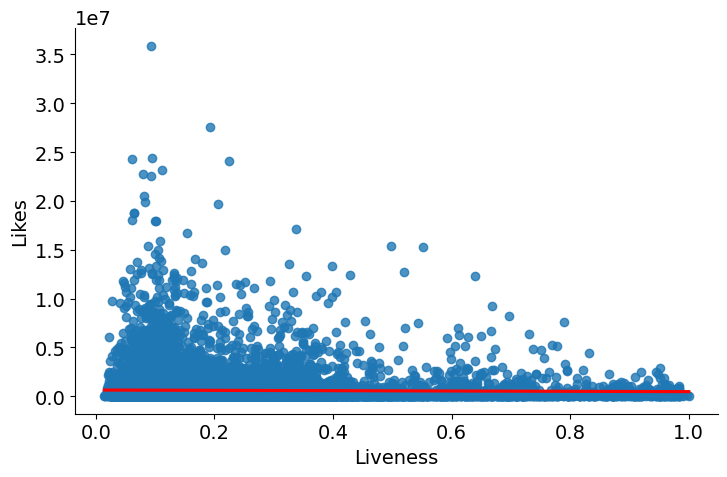

In [60]:
sns.lmplot(data=songs5, x='Liveness', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

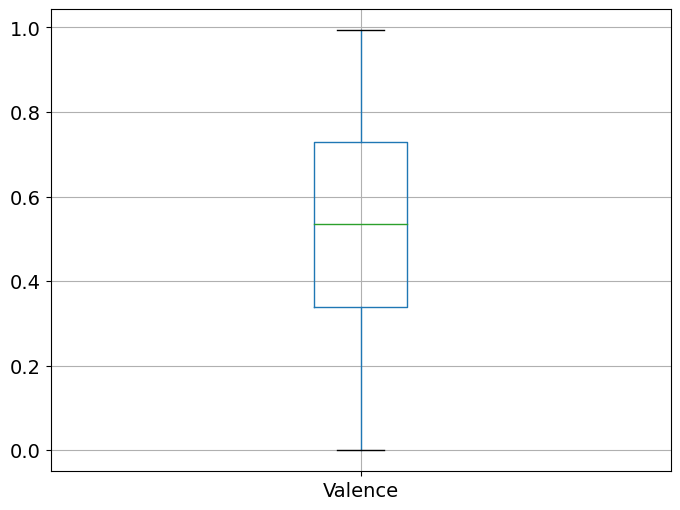

In [61]:
songs5.boxplot(column='Valence');

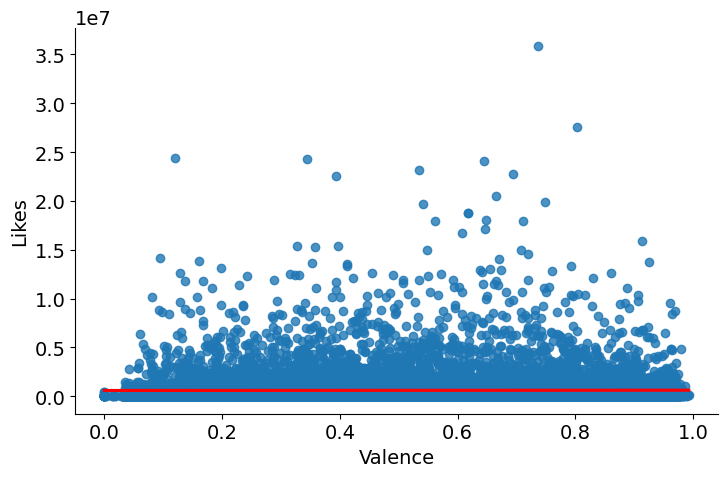

In [62]:
sns.lmplot(data=songs5, x='Valence', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

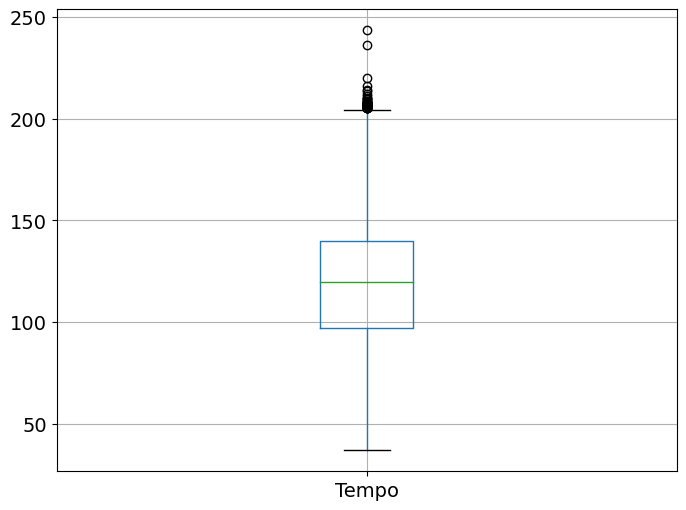

In [63]:
songs5.boxplot(column='Tempo');

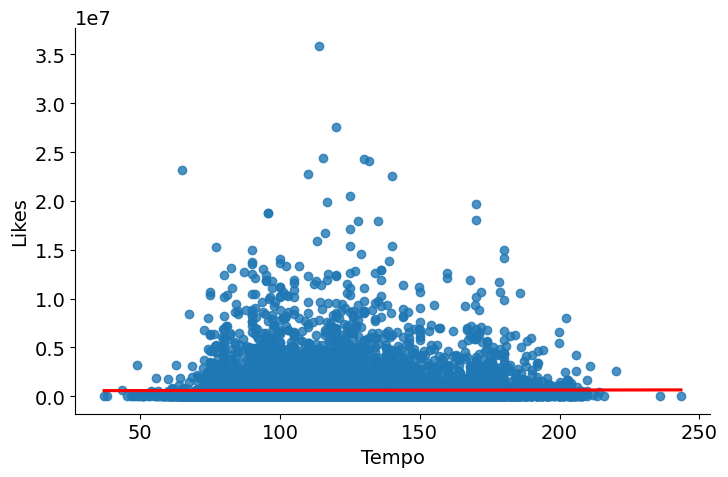

In [64]:
sns.lmplot(data=songs5, x='Tempo', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

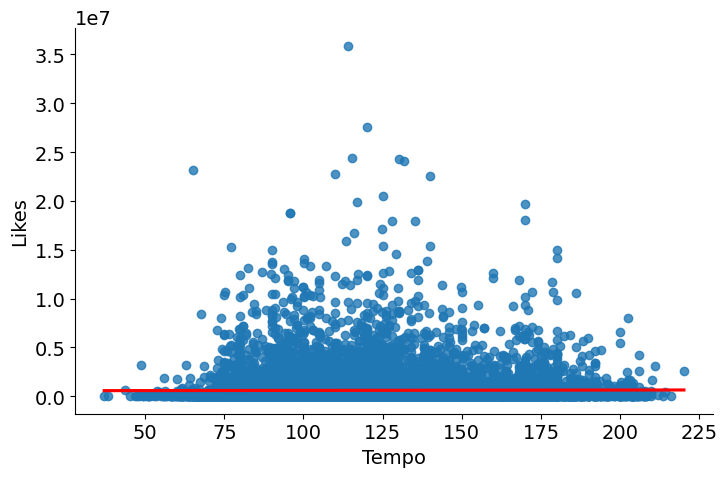

In [65]:
songs6 = songs5[songs5.Tempo < 230]
sns.lmplot(data=songs6, x='Tempo', y='Likes', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [66]:
rmse = get_rmse(songs6, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1514005
The best RMSE is still 1432140


In [67]:
rmse = get_rmse(songs6, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1532091
The best RMSE is still 1432140


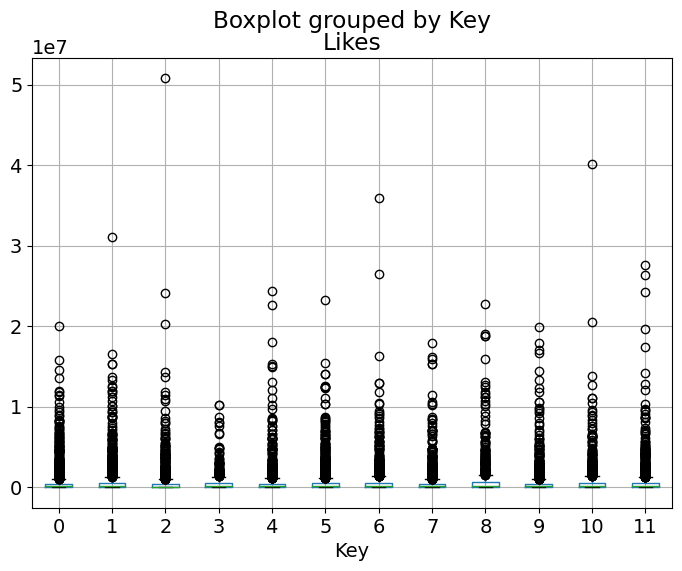

In [68]:
songs.boxplot(column='Likes', by='Key');

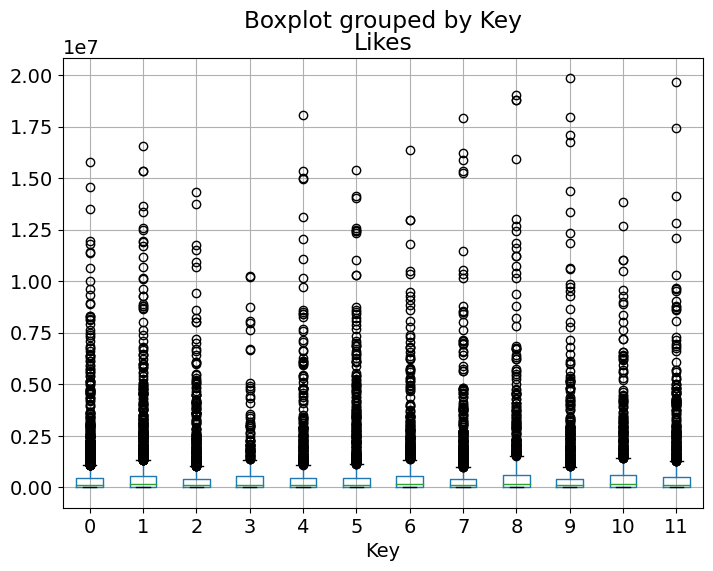

In [69]:
songs[songs.Likes <= 2e7].boxplot(column='Likes', by='Key');

In [70]:
songs6 = songs5[songs5.Likes <= 2e7]

In [71]:
rmse = get_rmse(songs6, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1423249
This is now the best RMSE.


In [72]:
rmse = get_rmse(songs6, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1429461
The best RMSE is still 1423249


### Restricting the dataset to likes under 20 million improved the RMSE.

In [73]:
songs7 = songs6[songs6.Duration_ms <= 1e6]
rmse = get_rmse(songs7, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1349954
This is now the best RMSE.


In [74]:
rmse = get_rmse(songs7, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1389850
The best RMSE is still 1349954


### This time, removing songs longer than 1 million ms improved the RMSE.

In [75]:
songs8 = songs7[songs7.Tempo < 230]
rmse = get_rmse(songs8, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1318429
This is now the best RMSE.


In [76]:
rmse = get_rmse(songs8, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1346542
The best RMSE is still 1318429


In [77]:
rmse = get_rmse(songs8, feature_columns_2, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1341943
The best RMSE is still 1318429


### Another improvement: removing songs with a `Tempo` of 0 or greater than 230

In [78]:
songs.shape[0] - songs8.shape[0], round(100 * (songs.shape[0] - songs8.shape[0]) / songs.shape[0], 2)

(61, 0.33)

### In all, I removed 61 songs, but this is only 0.33% of the original dataset.

### In some of the above scatterplots, the songs with high numbers of streams were concentrated at one end of the x domain. I will create a model with only these columns.

In [79]:
feature_columns_3 = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Duration_ms']

In [80]:
rmse = get_rmse(songs8, feature_columns_3, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1320705
The best RMSE is still 1318429


In [81]:
rmse = get_rmse(songs8, feature_columns_3, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1349612
The best RMSE is still 1318429


In [82]:
# Being even more selective with the concentration of points
feature_columns_4 = ['Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness']

In [83]:
rmse = get_rmse(songs8, feature_columns_4, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1323962
The best RMSE is still 1318429


In [84]:
rmse = get_rmse(songs8, feature_columns_4, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 1375589
The best RMSE is still 1318429


### The best model seems to include all the columns.
### Now let's try each column individually.

In [85]:
print(feature_columns_2)

['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Key_1', 'Key_2', 'Key_3', 'Key_4', 'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10', 'Key_11']


In [86]:
for col in feature_columns_2:
    col_rmse = get_rmse(songs8, [col], lin_reg)
    print(f'RMSE for {col}: {round(col_rmse)} {col_rmse < best_rmse}')

RMSE for Danceability: 1331497 False
RMSE for Energy: 1334500 False
RMSE for Loudness: 1325232 False
RMSE for Speechiness: 1338395 False
RMSE for Acousticness: 1332826 False
RMSE for Instrumentalness: 1334046 False
RMSE for Liveness: 1338190 False
RMSE for Valence: 1338537 False
RMSE for Tempo: 1338771 False
RMSE for Duration_ms: 1338504 False
RMSE for Key_1: 1338122 False
RMSE for Key_2: 1338050 False
RMSE for Key_3: 1338523 False
RMSE for Key_4: 1338546 False
RMSE for Key_5: 1338978 False
RMSE for Key_6: 1338357 False
RMSE for Key_7: 1337786 False
RMSE for Key_8: 1338399 False
RMSE for Key_9: 1338616 False
RMSE for Key_10: 1338557 False
RMSE for Key_11: 1338498 False


### No column by itself is as good at predicting streams as all of them together.

In [87]:
100 * (baseline_rmse - best_rmse) / baseline_rmse

24.744461829812035

### The best model is 24.74% better than always guessing the average number of streams.

### So what exactly is the best regression formula?

In [88]:
X = songs8[feature_columns_2]
y = songs8.Likes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lin_reg.fit(X_train, y_train)
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

In [89]:
model = str(intercept)

for i in range(len(feature_columns_2)):
    model += f'\n + {coefficients[i]} * {feature_columns_2[i]}'

print(model)

747925.9589155262
 + 812170.8692454074 * Danceability
 + -423203.59603893594 * Energy
 + 48601.21616394517 * Loudness
 + -151360.76359964957 * Speechiness
 + -140015.32200652102 * Acousticness
 + -10725.552767556206 * Instrumentalness
 + -33321.54703748675 * Liveness
 + -371074.95910783095 * Valence
 + 565.8800467523613 * Tempo
 + 0.7059081100210773 * Duration_ms
 + 35961.69175869454 * Key_1
 + -55236.56784097986 * Key_2
 + 29869.534824097103 * Key_3
 + 38565.09358601047 * Key_4
 + 106844.18111335383 * Key_5
 + 49625.96364977213 * Key_6
 + -61126.4258243448 * Key_7
 + 121331.80070072364 * Key_8
 + -23064.469989185967 * Key_9
 + 52703.44151906757 * Key_10
 + 22334.312840926337 * Key_11
